Importing

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
from scipy.interpolate import NearestNDInterpolator

Reading dataset

In [2]:
df=pd.read_csv("hepatitis.csv")

In [3]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


Check missing value

In [4]:
df.isna().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

check for missing value precentage

In [5]:
df.isna().sum()/len(df)*100
# 3 coloumns have more than 10% missing value so find correlation

age                 0.000000
sex                 0.000000
steroid             0.645161
antivirals          0.000000
fatigue             0.645161
malaise             0.645161
anorexia            0.645161
liver_big           6.451613
liver_firm          7.096774
spleen_palpable     3.225806
spiders             3.225806
ascites             3.225806
varices             3.225806
bilirubin           3.870968
alk_phosphate      18.709677
sgot                2.580645
albumin            10.322581
protime            43.225806
histology           0.000000
class               0.000000
dtype: float64

Replace boolean value and gender and class to ordianal numerical values

In [6]:
df=df.replace(to_replace=[False,True,"male","female","live","die"],value=[0,1,0,1,1,0])

check for correlcation

In [7]:
df.corr()
#alk_phosphate gonna be handled
#albumin  gonna be handled
#protime gonna be handled


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
age,1.000000,-0.008126,-0.085732,0.013100,0.282223,0.115236,-0.090394,-0.105480,0.109382,0.074853,0.179997,0.066220,0.048893,0.125463,0.008924,0.082545,-0.262981,-0.222233,0.170780,-0.219647
sex,-0.008126,1.000000,0.046989,-0.089249,-0.071822,-0.028820,0.017030,0.072336,-0.059761,-0.055556,-0.042220,0.130744,0.054707,0.056349,-0.074243,0.017652,-0.005828,0.011141,0.137450,-0.173051
steroid,-0.085732,0.046989,1.000000,-0.060101,-0.164326,-0.242942,-0.074380,0.214488,-0.086463,-0.077071,-0.028675,0.031453,0.074925,-0.050240,-0.040164,-0.042458,0.228148,0.102978,-0.090109,0.134700
antivirals,0.013100,-0.089249,-0.060101,1.000000,-0.059445,-0.018540,-0.043552,-0.042350,0.075593,-0.172756,-0.159695,-0.171184,-0.161165,-0.185023,-0.205236,-0.108138,0.170074,0.030287,-0.209242,0.130196
fatigue,0.282223,-0.071822,-0.164326,-0.059445,1.000000,0.595142,0.376350,-0.112892,0.272435,0.195256,0.383333,0.289931,0.187125,0.278918,0.165744,0.202089,-0.328319,-0.279844,0.151556,-0.309269
malaise,0.115236,-0.028820,-0.242942,-0.018540,0.595142,1.000000,0.599647,-0.057090,0.118382,0.013690,0.325979,0.332910,0.170193,0.299602,0.215880,0.205128,-0.307685,-0.263691,0.140592,-0.337859
anorexia,-0.090394,0.017030,-0.074380,-0.043552,0.376350,0.599647,1.000000,-0.091287,0.067320,0.041667,0.309614,0.196116,0.174380,0.303109,0.181680,0.238408,-0.163661,-0.063001,0.078895,-0.132172
liver_big,-0.105480,0.072336,0.214488,-0.042350,-0.112892,-0.057090,-0.091287,1.000000,-0.467950,-0.099083,-0.220389,0.110876,0.062366,-0.002392,-0.130565,0.043023,-0.057578,-0.089997,-0.072269,-0.077630
liver_firm,0.109382,-0.059761,-0.086463,0.075593,0.272435,0.118382,0.067320,-0.467950,1.000000,0.187541,0.355901,0.037966,0.189999,0.060703,0.356068,0.138305,-0.199022,-0.056773,0.191663,-0.063155
spleen_palpable,0.074853,-0.055556,-0.077071,-0.172756,0.195256,0.013690,0.041667,-0.099083,0.187541,1.000000,0.274430,0.098058,0.225668,0.220918,0.287592,0.002040,-0.244432,-0.158683,0.207331,-0.238734


In [8]:
#check KNN interpolation

Handle boolean values with 

In [9]:
df['steroid']=df['steroid'].fillna(df['steroid'].mode()[0])
df['fatigue']=df['fatigue'].fillna(df['fatigue'].mode()[0])
df['malaise']=df['malaise'].fillna(df['malaise'].mode()[0])
df['anorexia']=df['anorexia'].fillna(df['anorexia'].mode()[0])
df['liver_big']=df['liver_big'].fillna(df['liver_big'].mode()[0])
df['liver_firm']=df['liver_firm'].fillna(df['liver_firm'].mode()[0])
df['spleen_palpable']=df['spleen_palpable'].fillna(df['spleen_palpable'].mode()[0])
df['spiders']=df['spiders'].fillna(df['spiders'].mode()[0])
df['ascites']=df['ascites'].fillna(df['ascites'].mode()[0])
df['varices']=df['varices'].fillna(df['varices'].mode()[0])



Handle constant values with mean

In [10]:
df['bilirubin']=df['bilirubin'].fillna(df['bilirubin'].mean())
df['alk_phosphate']=df['alk_phosphate'].fillna(df['alk_phosphate'].mean())
df['sgot']=df['sgot'].fillna(df['sgot'].mean())
df['albumin']=df['albumin'].fillna(df['albumin'].mean())
df['protime']=df['protime'].fillna(df['protime'].mean())

check for correlation after handling the missing data and seprate features and labels

In [11]:
df.corr()


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
age,1.000000,-0.008126,-0.090466,0.013100,0.278701,0.117876,-0.088317,-0.089629,0.092001,0.061277,0.156545,0.055314,0.039229,0.122884,0.008076,0.081052,-0.246169,-0.153312,0.170780,-0.219647
sex,-0.008126,1.000000,0.048985,-0.089249,-0.070059,-0.030523,0.015886,0.081830,-0.078642,-0.048478,-0.033192,0.130587,0.056792,0.056218,-0.073253,0.017625,-0.005459,0.009125,0.137450,-0.173051
steroid,-0.090466,0.048985,1.000000,-0.043961,-0.175451,-0.240139,-0.073644,0.201478,-0.068376,-0.074816,-0.027290,0.031046,0.073548,-0.052804,-0.044223,-0.044154,0.216697,0.083434,-0.095367,0.137413
antivirals,0.013100,-0.089249,-0.043961,1.000000,-0.061339,-0.016251,-0.042072,-0.054746,0.099213,-0.164548,-0.147909,-0.164747,-0.155148,-0.181179,-0.197594,-0.107876,0.165443,0.027317,-0.209242,0.130196
fatigue,0.278701,-0.070059,-0.175451,-0.061339,1.000000,0.589030,0.372957,-0.099759,0.247505,0.186846,0.367948,0.281439,0.180511,0.273577,0.148708,0.199808,-0.311757,-0.208021,0.146579,-0.306049
malaise,0.117876,-0.030523,-0.240139,-0.016251,0.589030,1.000000,0.600545,-0.041697,0.091832,0.006470,0.307173,0.320228,0.161422,0.294889,0.194920,0.202801,-0.290698,-0.200760,0.144667,-0.339530
anorexia,-0.088317,0.015886,-0.073644,-0.042072,0.372957,0.600545,1.000000,-0.079685,0.052781,0.032536,0.287366,0.184053,0.163378,0.298034,0.153634,0.234824,-0.155587,-0.045235,0.081623,-0.133638
liver_big,-0.089629,0.081830,0.201478,-0.054746,-0.099759,-0.041697,-0.079685,1.000000,-0.479779,-0.095959,-0.215566,0.116465,0.049453,0.008299,-0.124201,0.050390,-0.057149,-0.071565,-0.060262,-0.093665
liver_firm,0.092001,-0.078642,-0.068376,0.099213,0.247505,0.091832,0.052781,-0.479779,1.000000,0.180607,0.345553,0.010196,0.208047,0.038876,0.323892,0.092868,-0.174551,-0.026348,0.157118,-0.020057
spleen_palpable,0.061277,-0.048478,-0.074816,-0.164548,0.186846,0.006470,0.032536,-0.095959,0.180607,1.000000,0.282523,0.103709,0.230190,0.200316,0.257316,-0.017947,-0.216003,-0.115620,0.211702,-0.234261


In [12]:
# after seeing the KNN interpolation only one of the following
# malaise and anorexia are related and need to drop one of them
x=df.drop(["malaise","class"],axis=1)
#x=df.drop(["anorexia","class"],axis=1)
y=df["class"]

No handles with labels found to put in legend.


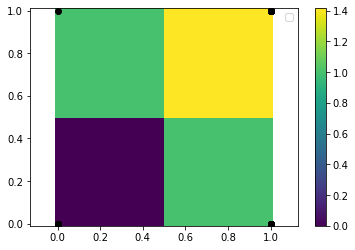

In [13]:

x1 = df["malaise"]
y1 = df["anorexia"]
z = np.hypot(x1, y1)
X = np.linspace(min(x1), max(x))
Y = np.linspace(min(y), max(y))
X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
interp = NearestNDInterpolator(list(zip(x, y)), z)
Z = interp(X, Y)
plt.pcolormesh(X, Y, Z, shading='auto')
plt.plot(x, y, "ok")
plt.legend()
plt.colorbar()
plt.axis("equal")
plt.show()

choose the model

In [14]:
model= DecisionTreeClassifier()

In [22]:
# after seeing the KNN interpolation only one of the following
# malaise and anorexia are related and need to drop one of them
x=df.drop(["malaise","class"],axis=1)
#x=df.drop(["anorexia","class"],axis=1)
y=df["class"]

Train test split

In [251]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=459)

In [252]:
X_train.shape

(124, 18)

In [253]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

Different accuracy score depends on removing a specific variable

In [254]:
# 0.8064516129032258for removing malaise
# 0.9354838709677419 for removing anorexia 

In [255]:
y_pred=model.predict(X_test)
print(accuracy_score(y_pred,y_test))
accuracy_score(Y_train,model.predict(X_train))


0.9354838709677419


1.0

function for plotting confussion matrix using matlab.lib

In [256]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

The result for our final confussion matrix

[[ 4  2]
 [ 0 25]]


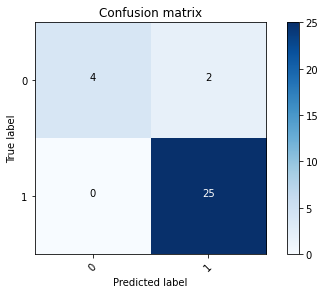

In [257]:

confusion_mtx = confusion_matrix(y_test, y_pred) 
print(confusion_mtx)
plot_confusion_matrix(confusion_mtx, classes = range(2))